In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
X_tr2 = X_train[(y_train==0)]
X_te2 = np.vstack([X_test[(y_test==0)], X_test[(y_test==1)][:10]])
y_te2 = np.array(sum(y_test==0)*[0] + 10*[1])
print(len(X_tr2), len(y_te2))

5923 990


In [6]:
X_tr2,X_val2 = train_test_split(X_tr2, test_size=0.3, random_state=1)
X_tr2 = X_tr2/255
X_val2 = X_val2/255
X_te2 = X_te2/255

In [7]:
model = keras.Sequential([
    keras.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape((28,28))
])

In [8]:
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        39,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,294 (313.65 KB)

 Trainable params: 80,294 (313.65 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
lista_callbacks=[
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
]

In [10]:
historia = model.fit(X_tr2, X_tr2, epochs=200, batch_size=128, validation_data=(X_val2, X_val2), callbacks=lista_callbacks)

Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2244 - val_loss: 0.1544
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1097 - val_loss: 0.0659
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0649 - val_loss: 0.0641
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0634 - val_loss: 0.0633
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0629 - val_loss: 0.0626
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0621 - val_loss: 0.0612
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599 - val_loss: 0.0572
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0559 - val_loss: 0.0522
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0507 - val_loss: 0.0481
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0470 - val_loss: 0.0453
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0449 - val_loss: 0.0443
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

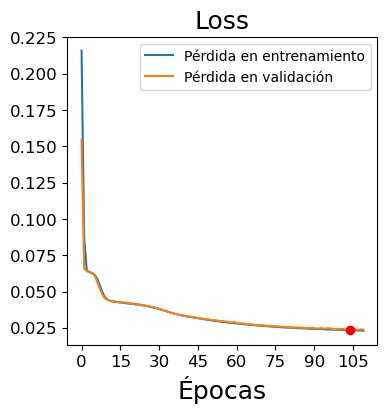

In [ ]:
f = plt.figure(figsize=(4,4))
h = historia.history
mejor_epoca = np.argmin(h['val_loss'])
plt.plot(h['loss'], label='Pérdida en entrenamiento')
plt.plot(h['val_loss'], label='Pérdida en validación')
plt.plot(mejor_epoca, h['val_loss'][mejor_epoca], 'or')
plt.title('Loss',fontsize=18),
plt.xlabel('Épocas',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
f.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [12]:
model = keras.models.load_model('best_model.keras')

In [13]:
errores = (X_te2 - model.predict(X_te2))**2
print(errores.shape)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
(990, 28, 28)


In [14]:
error_por_imagen = (errores.sum(axis=1).sum(axis=1)/(28*28))

In [15]:
inds = np.argsort(error_por_imagen)[::-1]

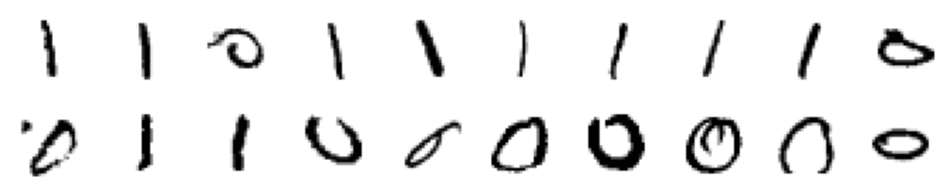

In [16]:
plt.figure(figsize=(12,12))
cont = 1
for ind in inds[:20]:
    plt.subplot(10,10,cont)
    plt.imshow(X_te2[ind], cmap='binary')
    plt.axis('off')
    cont += 1